In [1]:
# Assignment 2, Problem 4
# Gradient Method (GM)
# U. Kamilov, Z. Zou
# Computational Imaging Group (CIG), WashU

# Import useful libraries
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = sio.loadmat('dataset.mat')

In [3]:
# Access data in the dataset
A, b = data['A'], data['b']
m, n = A.shape

In [4]:
# Define the function and the gradient
evaluateFunc = lambda x: (1/2)*np.linalg.norm(A.dot(x)-b)**2
evaluateGrad = lambda x: A.T.dot(A.dot(x)-b)

In [5]:
# Parameters of the gradient method
xInit = np.zeros((n, 1)) # zero initialization
stepSize = 1e-4 # step size
maxIter = 200 # maximum number of iterations

In [6]:
# Initialize
x = xInit
objVals = np.zeros((maxIter, 1)) # keep track of cost function values

In [7]:
for iter in range(maxIter):
    # gradient at x
    grad = evaluateGrad(x)
    
    # update
    xNext = x - stepSize*grad
    
    # evaluate the objective
    funcNext = evaluateFunc(xNext)
    
    # store the objective
    objVals[iter] = funcNext
    
    #print('[%d/%d] [step: %.1e] [objective: %.4e]' % (iter, maxIter, stepSize, objVals[iter]))
    
    # update x
    x = xNext

/tmp/ipykernel_177644/2704144542.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('cost: %.4e' % objVals[-1], fontsize = 20)


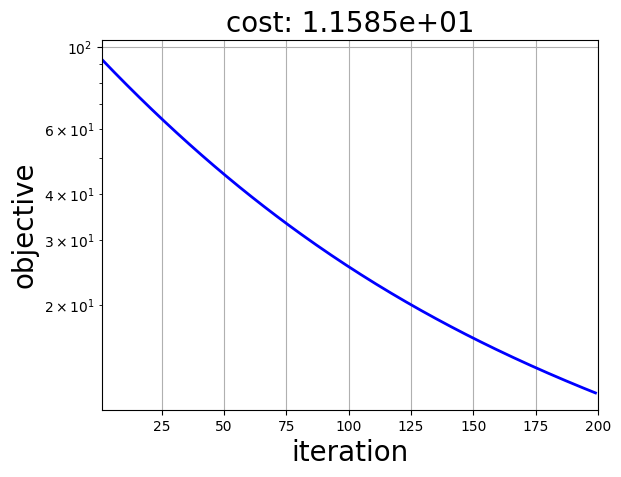

In [8]:
# visualize results
plt.semilogy(np.arange(maxIter), objVals, 'b-', linewidth=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('iteration', fontsize = 20)
plt.ylabel('objective', fontsize = 20)
plt.title('cost: %.4e' % objVals[-1], fontsize = 20)
plt.xlim([1, maxIter])
plt.draw()
plt.show()

# Backtracking Line Search

In [9]:
# Parameters of the gradient method
xInit = np.zeros((n, 1)) # zero initialization
stepSize = 100 # step size
maxIter = 200 # maximum number of iterations
beta = 0.5 # reduction factor
c = 0.5

In [10]:
# Initialize
x = xInit
objVals = np.zeros((maxIter, 1)) # keep track of cost function values

In [11]:
for iter in range(maxIter):
    # Gradient at current x
    grad = evaluateGrad(x)
    
    # Initialize step size for this iteration
    stepSize_ = stepSize

    # Evaluate function value at current x
    funcThis = evaluateFunc(x)

    # Backtracking line search to satisfy Armijo condition
    while True:
        # Candidate update
        xNext = x - stepSize_ * grad
        
        # Evaluate function at the candidate point
        funcNext = evaluateFunc(xNext)

        # Check Armijo condition
        if funcNext <= funcThis - c * stepSize_ * np.linalg.norm(grad)**2:
            break  # Sufficient decrease condition met
        
        # If condition not met, reduce step size
        stepSize_ *= beta
    
    # Store the objective
    objVals[iter] = funcNext
    
    #print('[%d/%d] [step: %.1e] [objective: %.4e]' % (iter, maxIter, stepSize_, objVals[iter]))
    
    # Update x to the next point
    x = xNext


/tmp/ipykernel_177644/2704144542.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('cost: %.4e' % objVals[-1], fontsize = 20)


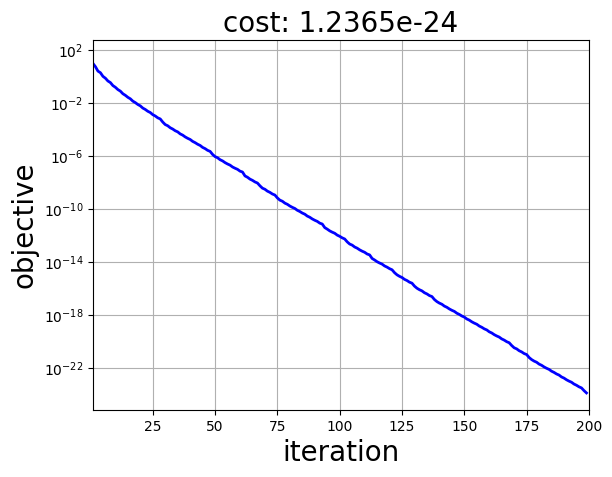

In [12]:
# visualize results
plt.semilogy(np.arange(maxIter), objVals, 'b-', linewidth=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('iteration', fontsize = 20)
plt.ylabel('objective', fontsize = 20)
plt.title('cost: %.4e' % objVals[-1], fontsize = 20)
plt.xlim([1, maxIter])
plt.draw()
plt.show()

# Accelerated Gradient method

In [13]:
# Parameters of the gradient method
xInit = np.zeros((n, 1)) # zero initialization
stepSize = 100 # step size
maxIter = 200 # maximum number of iterations
beta = 0.5 # reduction factor
c = 0.5

In [14]:
# Initialize
x = xInit
objVals = np.zeros((maxIter, 1)) # keep track of cost function values

In [15]:
s = x
theta_prev = 1
for iter in range(maxIter):
    theta = (iter + 2) / 2 # iter starts with 0

    # Gradient at current x
    grad = evaluateGrad(s)
    
    stepSize_ = stepSize

    funcThis = evaluateFunc(s)

    while True:

        xNext = s - stepSize_ * grad
        
        funcNext = evaluateFunc(xNext)

        if funcNext <= funcThis - c * stepSize_ * np.linalg.norm(grad)**2:
            break  
        
        stepSize_ *= beta
    
    # Store the objective
    objVals[iter] = funcNext
    
    #print('[%d/%d] [step: %.1e] [objective: %.4e]' % (iter, maxIter, stepSize_, objVals[iter]))
    
    beta_agm = (theta_prev - 1) / theta
    assert beta_agm >= 0 and beta_agm <= 1
    
    theta_prev = theta

    s = xNext + beta_agm * (xNext - x)
    x = xNext


/tmp/ipykernel_177644/2704144542.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('cost: %.4e' % objVals[-1], fontsize = 20)


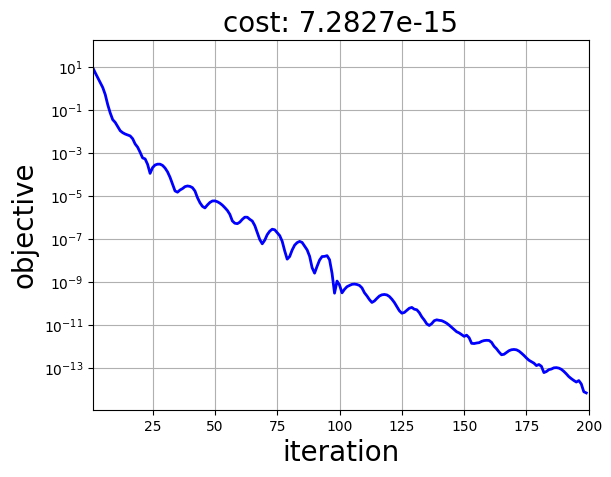

In [16]:
# visualize results
plt.semilogy(np.arange(maxIter), objVals, 'b-', linewidth=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('iteration', fontsize = 20)
plt.ylabel('objective', fontsize = 20)
plt.title('cost: %.4e' % objVals[-1], fontsize = 20)
plt.xlim([1, maxIter])
plt.draw()
plt.show()

# Subgradient Method for g

In [17]:
# Parameters of the gradient method
xInit = np.zeros((n, 1)) # zero initialization
stepSize = 1e-3 # step size
maxIter = 200 # maximum number of iterations

In [18]:
# Initialize
x = xInit
objVals = np.zeros((maxIter, 1)) # keep track of cost function values

In [19]:
def evaluateSubGrad(x):
    return A.T @ np.sign(A @ x - b)

def evaluateFunc(x):
    return np.linalg.norm(A @ x - b, ord=1)

In [20]:
x.shape

(32, 1)

In [21]:
for iter in range(maxIter):

    # Gradient at current x
    subgrad = evaluateSubGrad(x)

    xNext = x - stepSize * subgrad

    funcNext = evaluateFunc(xNext)

    # Store the objective
    objVals[iter] = funcNext
    
    #print('[%d/%d] [step: %.1e] [objective: %.4e]' % (iter, maxIter, stepSize_, objVals[iter]))
    
    x = xNext

/tmp/ipykernel_177644/2704144542.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('cost: %.4e' % objVals[-1], fontsize = 20)


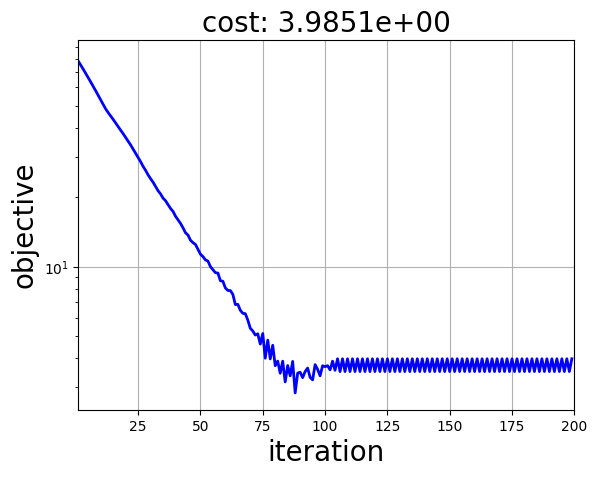

In [22]:
# visualize results
plt.semilogy(np.arange(maxIter), objVals, 'b-', linewidth=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('iteration', fontsize = 20)
plt.ylabel('objective', fontsize = 20)
plt.title('cost: %.4e' % objVals[-1], fontsize = 20)
plt.xlim([1, maxIter])
plt.draw()
plt.show()